In [1]:
%run -i settings.py

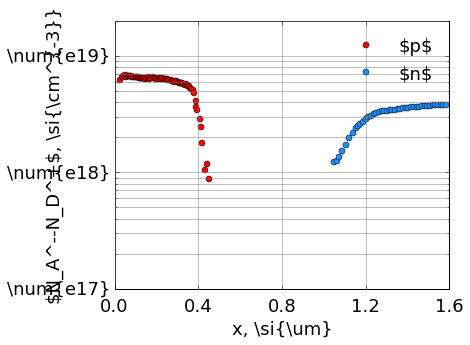

In [4]:
nx = plt.figure().add_subplot(111)
nx.set_xlabel(r'x, \si{\um}')
nx.set_ylabel(r'\$N_A^--N_D^+$, \si{\cm^{-3}}')
nx.set_ylim(1e17,2e19)
nx.set_xlim(0,1.6)
nx.grid(linestyle='-', which='both', color='gray', zorder=0)

dop, x = ecvproc.ep_read('./data/gan_414-80@1.568.EP')
nx.semilogy(x, dop, 'o', label=r'\$p$', mfc='r')
nx.semilogy(x, -dop, 'o', label=r'\$n$', mfc='dodgerblue')

nx.yaxis.set_major_formatter(exponent) # exponent in setup.py
nx.yaxis.set_label_coords(-0.15,0.5)
nx.xaxis.set_major_locator(ticker.MultipleLocator(0.4))
nx.tick_params(axis='x', pad=8)
plt.legend(loc='best', frameon=False, numpoints=1)
plt.savefig('gan_414.svg')
plt.show()

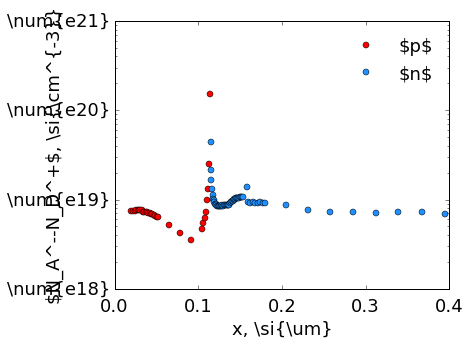

In [28]:
nx = plt.figure().add_subplot(111)
nx.set_xlabel(r'x, \si{\um}')
nx.set_ylabel(r'\$N_A^--N_D^+$, \si{\cm^{-3}}')
nx.set_ylim(1e18,1e21)
nx.set_xlim(0,0.4)
# nx.grid(linestyle='-', which='both', color='gray', zorder=0)

dop, x = ecvproc.ep_read('./data/gan_427-1-47@0.616.EP')
nx.semilogy(x, dop, 'o', label=r'\$p$', mfc='r')
nx.semilogy(x, -dop, 'o', label=r'\$n$', mfc='dodgerblue')

nx.yaxis.set_major_formatter(exponent) # exponent in setup.py
nx.yaxis.set_label_coords(-0.15,0.5)
nx.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
nx.tick_params(axis='x', pad=8)
plt.legend(loc='best', frameon=False, numpoints=1)
# plt.savefig('gan_427.svg')
plt.show()

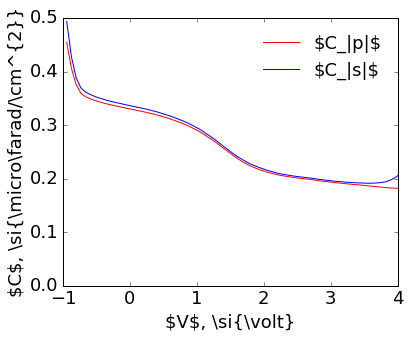

In [83]:
cv = plt.figure().add_subplot(111)
cap, volt = ecvproc.cv_read('./data/N370-1-4@0.000.CV', model='Cp')
cv.plot(volt, cap, 'r-', label=r'\$C_|p|$')
cap, volt = ecvproc.cv_read('./data/N370-1-4@0.000.CV', model='Cs')
cv.plot(volt, cap, 'b-', label=r'\$C_|s|$')
cv.set_ylim(0, 0.5)
cv.set_xlim(-1, 4)

cv.set_xlabel(r'\$V$, \si{\volt}')
cv.set_ylabel(r'\$C$, \si{\micro\farad/\cm^{2}}')
plt.legend(loc='best', frameon=False, numpoints=1)
plt.savefig('gan_n370_cv.svg')

c:\users\frolo\onedrive\projects\python\admproc\admproc\admproc.py:200: RuntimeWarning: invalid value encountered in true_divide
  dC = (cap[1:]-cap[:-1])/(volt[1:]-volt[:-1])
settings.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 99
  # locale.setlocale(locale.LC_ALL, 'deu_deu')


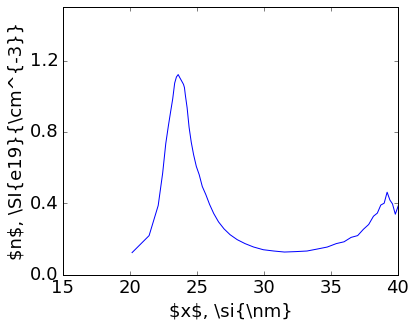

In [82]:
cap, volt = ecvproc.cv_read('./data/N370-1-4@0.000.CV', model='Cp')
dop, x = admproc.nxcalc(cap*1e-6, volt, area=1, eps=8.9)

dop = dop[~np.isnan(dop)]
x = x[~np.isnan(dop)]
#moving average
n = 3.
w = np.ones(n, dtype=float)
w = w/np.sum(w)

dop = np.convolve(dop, w, 'valid')
x = x[1:-1]

nx = plt.figure().add_subplot(111)
nx.set_xlabel(r'\$x$, \si{\nm}')
nx.set_ylabel(r'\$n$, \SI{e19}{\cm^{-3}}')
nx.set_ylim(0, 1.5)
nx.set_xlim(15, 40)
nx.yaxis.set_major_locator(ticker.MultipleLocator(0.4))
nx.plot(x, -dop*1e-19)
# plt.savefig('gan_n370_nx.svg')

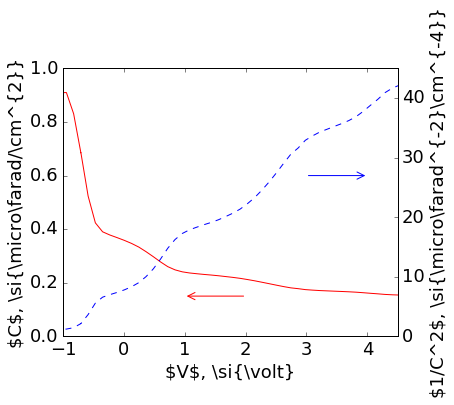

In [98]:
cv = plt.figure().add_subplot(111)
c2 = cv.twinx()
cap, volt = ecvproc.cv_read('./data/SEMCO-5@0.000.CV', model='Cp')
cv.plot(volt, cap, 'r-', label=r'\$C_|p|$')
c2.plot(volt, 1/cap**2, 'b--')
cv.set_ylim(0, 1)
cv.set_xlim(-1, 4.5)

c2.yaxis.set_major_locator(ticker.MultipleLocator(10))
c2.set_ylabel(r'\$1/C^2$, \si{\micro\farad^{-2}\cm^{-4}}')
cv.set_xlabel(r'\$V$, \si{\volt}')
cv.set_ylabel(r'\$C$, \si{\micro\farad/\cm^{2}}')

cv.annotate('', xy=(4, 0.6), xytext=(3, 0.6), va='center', ha='left',
           arrowprops={'arrowstyle': '->', 'color':'b'})

cv.annotate('', xy=(1, 0.15), xytext=(2, 0.15), va='center', ha='left',
           arrowprops={'arrowstyle': '->', 'color':'r'})


plt.savefig('gan_semco_cv.svg')

c:\users\frolo\onedrive\projects\python\admproc\admproc\admproc.py:200: RuntimeWarning: divide by zero encountered in true_divide
  dC = (cap[1:]-cap[:-1])/(volt[1:]-volt[:-1])


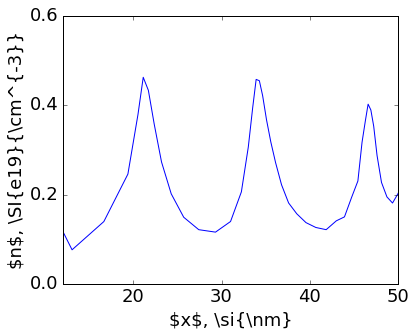

In [106]:
cap, volt = ecvproc.cv_read('./data/SEMCO-5@0.000.CV', model='Cp')
volt[(volt > -1)&(volt < 4.5)]
cap[(volt > -1)&(volt < 4.5)]

dop, x = admproc.nxcalc(cap*1e-6, volt, area=1, eps=8.9)

dop = dop[~np.isnan(dop)]
x = x[~np.isnan(dop)]
#moving average
n = 3.
w = np.ones(n, dtype=float)
w = w/np.sum(w)

dop = np.convolve(dop, w, 'valid')
x = x[1:-1]

nx = plt.figure().add_subplot(111)
nx.set_xlabel(r'\$x$, \si{\nm}')
nx.set_ylabel(r'\$n$, \SI{e19}{\cm^{-3}}')
nx.set_ylim(0, 0.6)
nx.set_xlim(12, 50)
nx.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
nx.xaxis.set_major_locator(ticker.MultipleLocator(10))
nx.plot(x, -dop*1e-19)
plt.savefig('gan_semco_nx.svg')

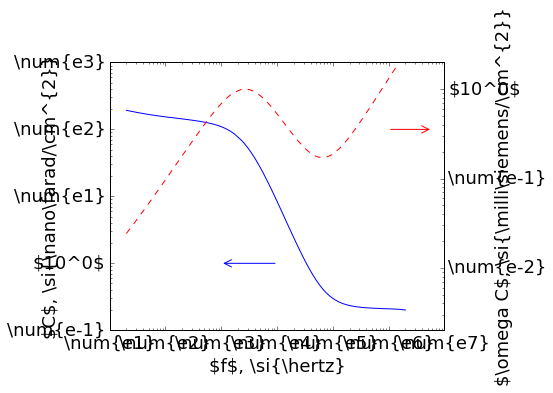

In [98]:
data = np.genfromtxt('./data/gan_ptype_fig22b.dat').T
freq = data[0]
cap = data[1]*10 # nF/cm2

cf = plt.figure().add_subplot(111)
cf2 = cf.twinx()
cf.set_xlabel(r'\$f$, \si{\hertz}')
cf.set_ylabel(r'\$C$, \si{\nano\farad/\cm^{2}}')
cf2.set_ylabel(r'\$\omega C$, \si{\milli\siemens/\cm^{2}}')
cf.loglog(freq, cap)
cf2.loglog(freq, cap*2*np.pi*freq*1e-6, 'r--')
cf2.set_ylim(2e-3,2)
cf.yaxis.set_major_formatter(exponent) # exponent in setup.py
cf.xaxis.set_major_formatter(exponent) # exponent in setup.py
cf2.yaxis.set_major_formatter(exponent) # exponent in setup.py
cf.yaxis.set_label_coords(-0.15,0.5)
cf2.yaxis.set_label_coords(1.15,0.5)

cf.annotate('', xy=(6e6, 1e2), xytext=(1e6, 1e2), va='center', ha='left',
           arrowprops={'arrowstyle': '->', 'color':'r'})

cf.annotate('', xy=(1e3, 1), xytext=(1e4, 1), va='center', ha='left',
           arrowprops={'arrowstyle': '->', 'color':'b'})
plt.savefig('gan_ptype_fig22b.svg')

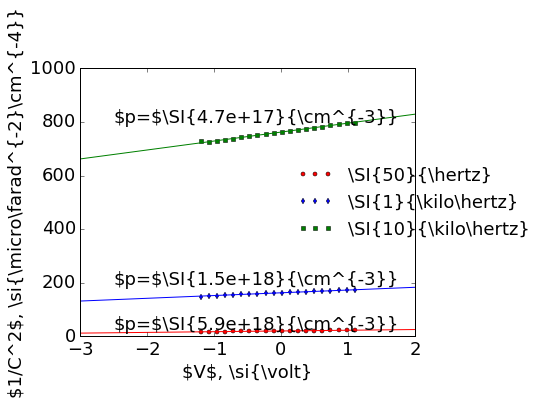

In [96]:
v1 = -2.5
cv = plt.figure().add_subplot(111)
cv.set_ylabel(r'\$1/C^2$, \si{\micro\farad^{-2}\cm^{-4}}')
cv.set_xlabel(r'\$V$, \si{\volt}')
cv.set_xlim(-3, 2)
cv.xaxis.set_major_locator(ticker.MultipleLocator(1))


data = np.genfromtxt('./data/gan_ptype_fig22a.dat').T
volt = data[0]

c1 = 1/np.sqrt(data[1])*1e-2
cap_fit, volt_fit, dop = ecvproc.lin_fit(c1, volt, eps=8.9, vmin = -1)
cv.plot(volt, 1/c1**2, 'ro', label=r'\SI{50}{\hertz}', ms=4)
cv.plot(volt_fit, cap_fit, 'r')
label = r'\$p=$'+r'\SI{'+'{:.1e}'.format(-dop)+'}{\cm^{-3}}'
cv.text(v1, 1.5*min(1/c1**2), label)

c1 = 1/np.sqrt(data[3])*1e-2
cap_fit, volt_fit, dop = ecvproc.lin_fit(c1, volt, eps=8.9, vmin = -1)
cv.plot(volt, 1/c1**2, 'bd', label=r'\SI{1}{\kilo\hertz}', ms=4)
cv.plot(volt_fit, cap_fit, 'b')
label = r'\$p=$'+r'\SI{'+'{:.1e}'.format(-dop)+'}{\cm^{-3}}'
cv.text(v1, 1.3*min(1/c1**2), label)

c1 = 1/np.sqrt(data[5])*1e-2
cap_fit, volt_fit, dop = ecvproc.lin_fit(c1, volt, eps=8.9, vmin = -1)
cv.plot(volt, 1/c1**2, 'gs', label=r'\SI{10}{\kilo\hertz}', ms=4)
cv.plot(volt_fit, cap_fit, 'g')
label = r'\$p=$'+r'\SI{'+'{:.1e}'.format(-dop)+'}{\cm^{-3}}'
cv.text(v1, 1.1*min(1/c1**2), label)

plt.legend(loc='best', frameon=False, numpoints=3, bbox_to_anchor=(0.6, 0.5)
)
plt.savefig('gan_ptype_fig22a.svg')

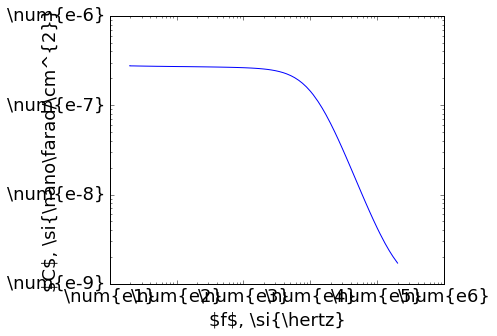

In [71]:
data = np.genfromtxt('./data/gan_ntype_fig22b.dat').T
freq = data[0]
cap = data[1]*10 # nF/cm2

cf = plt.figure().add_subplot(111)
cf.set_xlabel(r'\$f$, \si{\hertz}')
cf.set_ylabel(r'\$C$, \si{\nano\farad/\cm^{2}}')
cf.loglog(freq, cap)
cf.yaxis.set_major_formatter(exponent) # exponent in setup.py
cf.xaxis.set_major_formatter(exponent) # exponent in setup.py
cf.yaxis.set_label_coords(-0.15,0.5)

plt.savefig('gan_ntype_fig22b.svg')

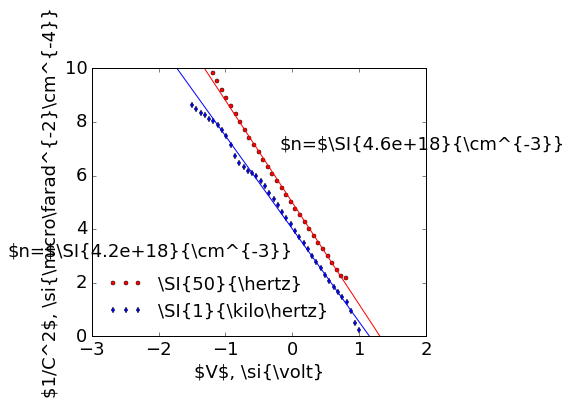

In [89]:
cv = plt.figure().add_subplot(111)
cv.set_ylabel(r'\$1/C^2$, \si{\micro\farad^{-2}\cm^{-4}}')
cv.set_xlabel(r'\$V$, \si{\volt}')
cv.set_xlim(-3, 2)
cv.set_ylim(0, 10)
cv.xaxis.set_major_locator(ticker.MultipleLocator(1))


data = np.genfromtxt('./data/gan_ntype_fig22a.dat', delimiter='\t').T
volt = data[0]

c1 = 1/np.sqrt(data[1])*1e-2
cap_fit, volt_fit, dop = ecvproc.lin_fit(c1, volt, eps=8.9, vmin = -1)
cv.plot(volt, 1/c1**2, 'ro', label=r'\SI{50}{\hertz}', ms=4)
cv.plot(volt_fit, cap_fit, 'r')
label = r'\$n=$'+r'\SI{'+'{:.1e}'.format(dop)+'}{\cm^{-3}}'
cv.text(0, 3, label,  ha='right')

volt = data[2]
c1 = 1/np.sqrt(data[3])*1e-2
cap_fit, volt_fit, dop = ecvproc.lin_fit(c1, volt, eps=8.9, vmin = -1)
cv.plot(volt, 1/c1**2, 'bd', label=r'\SI{1}{\kilo\hertz}', ms=4)
cv.plot(volt_fit, cap_fit, 'b')
label = r'\$n=$'+r'\SI{'+'{:.1e}'.format(dop)+'}{\cm^{-3}}'
cv.text(-0.2, 7, label)


plt.legend(loc='best', frameon=False, numpoints=3)
plt.savefig('gan_ntype_fig22a.svg')

In [77]:
np.genfromtxt?